In [11]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib
import nltk
from nltk.stem import PorterStemmer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import StandardScaler
# from keras.preprocessing.text import Tokenizer

In [2]:
df=pd.read_csv("/kaggle/input/final-cleaned-data/cleaned_data_final.csv")

In [3]:
df.head()

,Polarity,Review
0,2,"['i', 'too', 'purchased', 'cd', 'player', 'yea..."
1,2,"['things', 'review', 'say', 'yep', 'nope', 'i'..."
2,1,"['think', 'stupid', 'write', 'words', 'rate', ..."
3,2,"['great', 'book', 'great', 'series', 'great', ..."
4,1,"['ratings', 'assign', 'movie', 'based', 'envir..."


In [5]:
df["Review"][0]

"['i', 'too', 'purchased', 'cd', 'player', 'year', 'old', 'daughter', 'really', 'impressed', 'sound', 'quality', 'price', 'plan', 'leave', 'player', 'stationary', 'on', 'desk', 'etc', 'think', 'pleased', 'also', 'excellent', 'gift', 'young', 'child', 'need', 'topoftheline', 'player', 'price', 'reasonable', 'unit', 'straightforward', 'easy', 'use']"

In [6]:
df["Review"]=df["Review"].apply(lambda x : ast.literal_eval(x))
type(df["Review"][0])

list

In [ ]:
# def replace_dash_with_space(input_string):
#     return input_string.replace("-", " ")

In [ ]:
# replace_dash_with_space(df["Review"])

In [7]:
# Convert the list back to string
df['Review'] = df['Review'].apply(lambda x: ' '.join(x))
print("success")

success


In [ ]:
# # Define the stem_text function
# def stem_text(text):
#     """Stems the text using PorterStemmer.

#     Args:
#         text: The text to be stemmed.

#     Returns:
#         The stemmed text.
#     """
#     stemmer = PorterStemmer()
#     words = text.split()
#     stemmed_text = " ".join([stemmer.stem(word) for word in words])
#     return stemmed_text
# # Applying the stem_text function to the 'Review' column
# df['Review'] = df['Review'].apply(lambda x: stem_text(x))

# # Printing or displaying the DataFrame after applying the function
# print(df.head())  # Or display(df.head()) if you're using a Jupyter Notebook

In [8]:
df.head()

,Polarity,Review
0,2,i too purchased cd player year old daughter re...
1,2,things review say yep nope i m short r words r...
2,1,think stupid write words rate movie think star...
3,2,great book great series great author writes cl...
4,1,ratings assign movie based environment another...


In [9]:
conversion = {1:0,2:1}
df["Polarity"]=df["Polarity"].map(conversion)

In [10]:
df.head()

,Polarity,Review
0,1,i too purchased cd player year old daughter re...
1,1,things review say yep nope i m short r words r...
2,0,think stupid write words rate movie think star...
3,1,great book great series great author writes cl...
4,0,ratings assign movie based environment another...


In [16]:
# Convert polarity to binary classification (0 and 1)
df['Polarity'] = df['Polarity'].apply(lambda x: 1 if x > 0 else 0)

# SVM

In [17]:
# Sample the dataset
df_sample = df.sample(n=100000, random_state=42)

In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_sample['Review'], df_sample['Polarity'], test_size=0.2, random_state=42)

In [20]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=10000)  # limit the number of features
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [21]:
# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [22]:
# Predict and evaluate
y_pred = svm_model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      9942
           1       0.86      0.86      0.86     10058

    accuracy                           0.86     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.86      0.86      0.86     20000



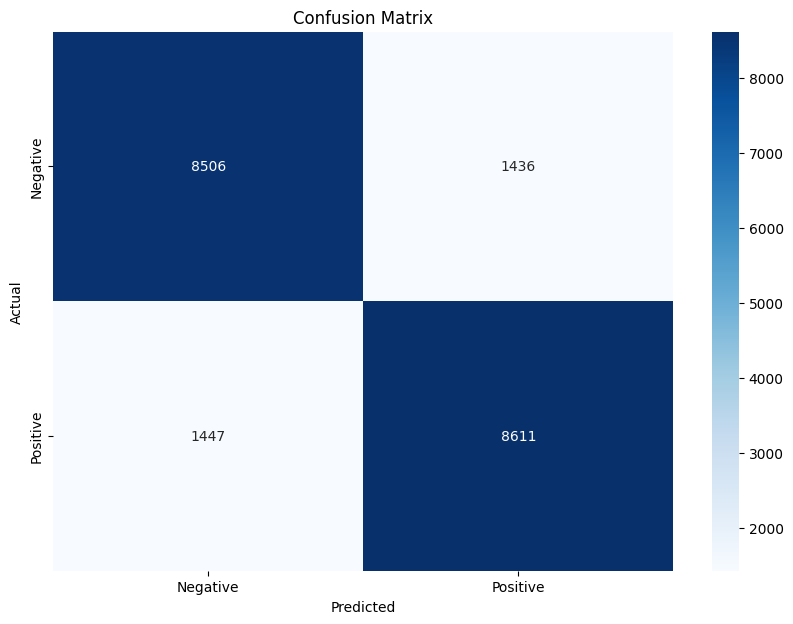

In [23]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

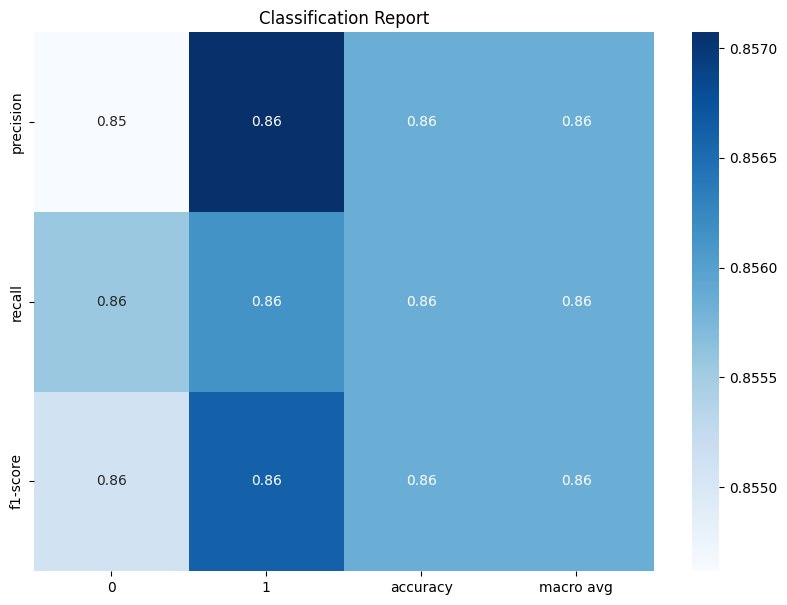

In [24]:
# Plot classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,7))
sns.heatmap(df_report.iloc[:-1, :-1].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

## Classification Report Summary

The Support Vector Machine (SVM) model was evaluated on a dataset containing 20,000 reviews, equally split between positive and negative sentiments. The performance metrics of the model are summarized below:

### Overall Metrics

- **Accuracy:** 86%
  - The model correctly predicts the sentiment (positive or negative) for 86% of the reviews.

### Class-Specific Metrics

For **Class 0 (Negative Reviews)**:
- **Precision:** 0.85
  - 85% of the reviews predicted as negative are actually negative.
- **Recall:** 0.86
  - The model correctly identifies 86% of the actual negative reviews.
- **F1-Score:** 0.86
  - This balance between precision and recall indicates the model is well-calibrated for negative reviews.
- **Support:** 9942 instances

For **Class 1 (Positive Reviews)**:
- **Precision:** 0.86
  - 86% of the reviews predicted as positive are actually positive.
- **Recall:** 0.86
  - The model correctly identifies 86% of the actual positive reviews.
- **F1-Score:** 0.86
  - This balance between precision and recall indicates the model is well-calibrated for positive reviews.
- **Support:** 10058 instances

### Averages

- **Macro Average:**
  - **Precision:** 0.86
  - **Recall:** 0.86
  - **F1-Score:** 0.86
  - These metrics treat all classes equally, providing a balanced evaluation.

- **Weighted Average:**
  - **Precision:** 0.86
  - **Recall:** 0.86
  - **F1-Score:** 0.86
  - These metrics consider the support of each class, giving a more accurate measure for imbalanced datasets.

### Interpretation

The SVM model demonstrates consistent and high performance across both positive and negative reviews. The balanced precision and recall scores indicate that the model is effective in correctly classifying the sentiment of the reviews, making it a reliable tool for sentiment analysis in this context.


In [13]:
# # save the data
# df.to_csv('ML_Cleaned_Data.csv', index=False)

# Logistic Regression

In [25]:
# Split data
X = df['Review']
y = df['Polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("success")

success


In [26]:
# Train logistic regression model
classifier = LogisticRegression(max_iter=600)
classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=600)

In [28]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

In [29]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88    359457
           1       0.88      0.88      0.88    359516

    accuracy                           0.88    718973
   macro avg       0.88      0.88      0.88    718973
weighted avg       0.88      0.88      0.88    718973



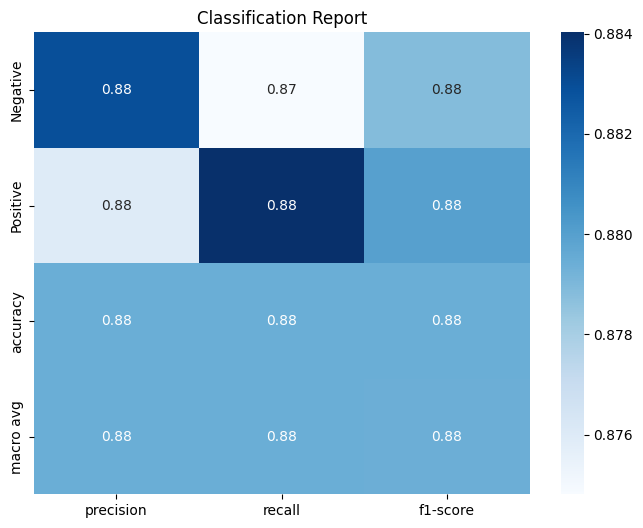

In [30]:
# Get classification report
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)

# Convert the report to DataFrame for easier plotting
report_df = pd.DataFrame(class_report).transpose()

# Plot classification report
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report')
plt.show()


In [31]:
# Print confusion matrix
print("Confusion Matrix:")
conf_matrix=confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[314457  45000]
 [ 41694 317822]]


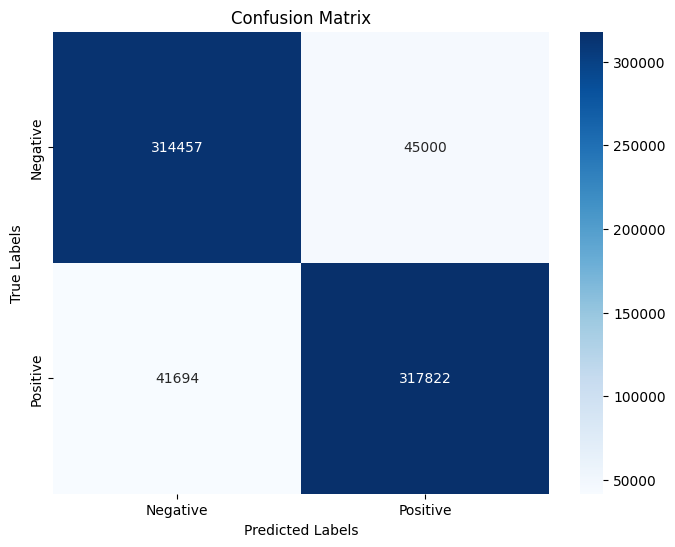

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Calculate test accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8794196722269125
